In [17]:
!pip install pandas matplotlib openpyxl
import pandas as pd

In [21]:
file_path = 'housing_data.xlsx'
xls = pd.ExcelFile(file_path)

xls.sheet_names

['Aggregate',
 'British_Columbia',
 'Vancouver_Island',
 'Victoria',
 'Lower_Mainland',
 'Greater_Vancouver',
 'Fraser_Valley',
 'Chilliwack_and_District',
 'Interior_BC',
 'Alberta',
 'Calgary',
 'Edmonton',
 'Saskatchewan',
 'Regina',
 'Saskatoon',
 'Winnipeg',
 'Ontario',
 'Bancroft_and_Area',
 'Barrie_and_District',
 'Brantford_Region',
 'Cambridge',
 'Grey_Bruce_Owen_Sound',
 'Guelph_and_District',
 'Hamilton_Burlington',
 'Huron_Perth',
 'Kawartha_Lakes',
 'Kingston_and_Area',
 'Kitchener_Waterloo',
 'Lakelands',
 'London_St_Thomas',
 'Mississauga',
 'Niagara_Region',
 'North_Bay',
 'Northumberland_Hills',
 'Oakville_Milton',
 'Ottawa',
 'Peterborough_and_Kawarthas',
 'Quinte_and_District',
 'Rideau_St_Lawrence',
 'Sault_Ste_Marie',
 'Simcoe_and_District',
 'Tillsonburg_District',
 'Greater_Toronto',
 'Woodstock_Ingersoll',
 'Quebec',
 'Centre_du_Quebec',
 'Estrie',
 'Mauricie',
 'Montreal_CMA',
 'Quebec_CMA',
 'New_Brunswick',
 'Fredericton',
 'Greater_Moncton',
 'Saint_John_NB'

In [22]:
df_agg = xls.parse('Aggregate')
df_agg.head()


,Date,Composite_HPI,Single_Family_HPI,One_Storey_HPI,Two_Storey_HPI,Townhouse_HPI,Apartment_HPI,Composite_Benchmark,Single_Family_Benchmark,One_Storey_Benchmark,Two_Storey_Benchmark,Townhouse_Benchmark,Apartment_Benchmark
0,2005-01-01,100.0,100.0,100.0,100.0,100.0,100.0,236400,256600,204100,299000,198800,169900
1,2005-02-01,101.0,101.0,101.2,100.9,100.9,101.2,238800,259200,206600,301600,200600,172000
2,2005-03-01,102.1,102.1,102.4,101.9,101.7,102.2,241300,262000,209100,304700,202100,173700
3,2005-04-01,103.1,103.2,103.8,102.9,102.4,103.1,243800,264900,211800,307600,203600,175100
4,2005-05-01,103.8,103.9,104.7,103.3,103.2,104.1,245400,266500,213600,309000,205100,176800


In [25]:
df_agg['Date'] = pd.to_datetime(df_agg['Date']) #changing the date column to date type


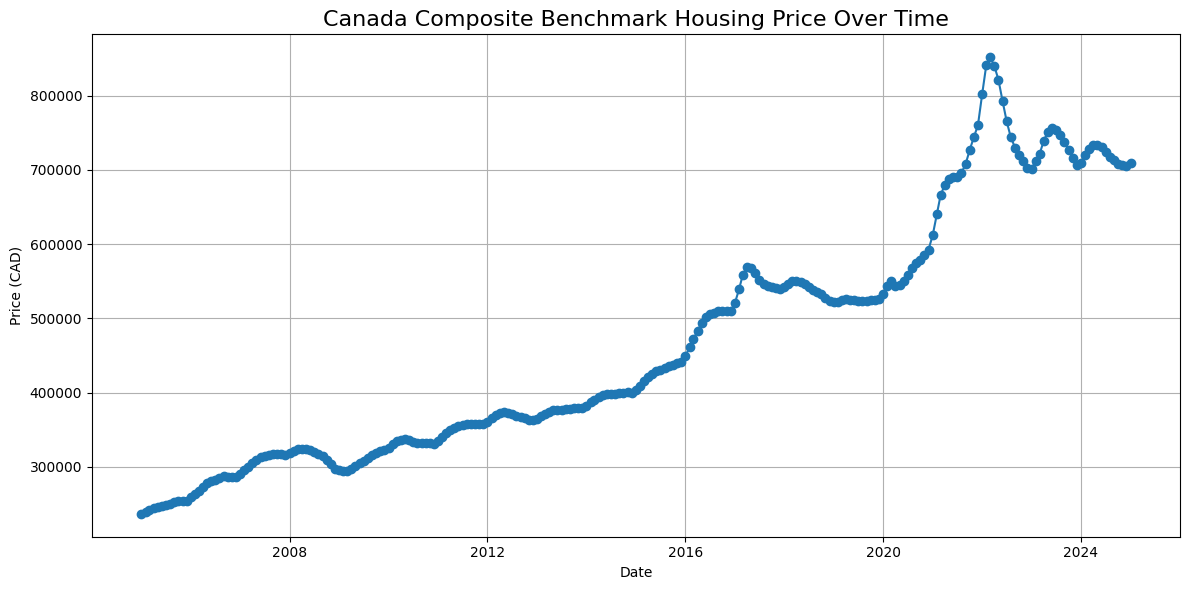

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
plt.plot(df_agg['Date'], df_agg['Composite_Benchmark'], marker ='o')
plt.title('Canada Composite Benchmark Housing Price Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price (CAD)')
plt.grid(True)
plt.tight_layout()
plt.show()

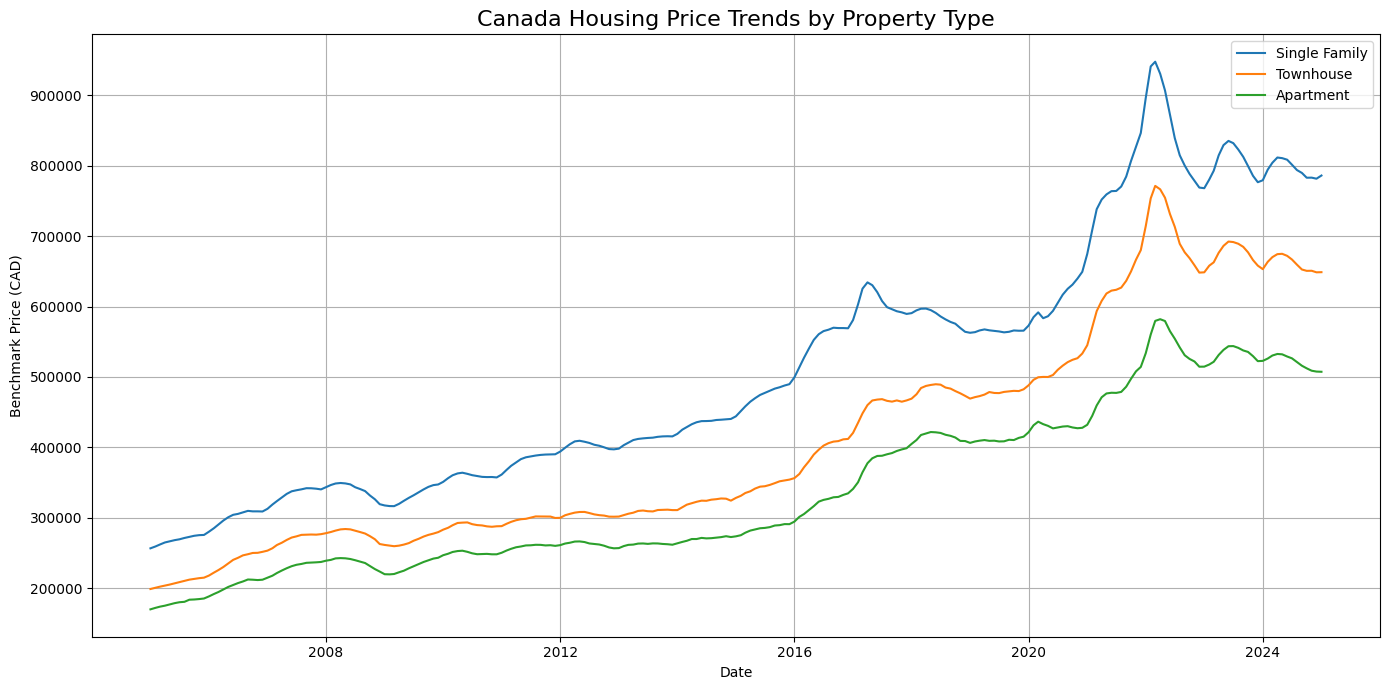

In [29]:
plt.figure(figsize=(14, 7))  # Set size of the chart

# Plot each housing type
plt.plot(df_agg['Date'], df_agg['Single_Family_Benchmark'], label='Single Family')
plt.plot(df_agg['Date'], df_agg['Townhouse_Benchmark'], label='Townhouse')
plt.plot(df_agg['Date'], df_agg['Apartment_Benchmark'], label='Apartment')

 #Add title, labels, and legend
plt.title('Canada Housing Price Trends by Property Type', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Benchmark Price (CAD)')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Prevent layout issues


plt.show()

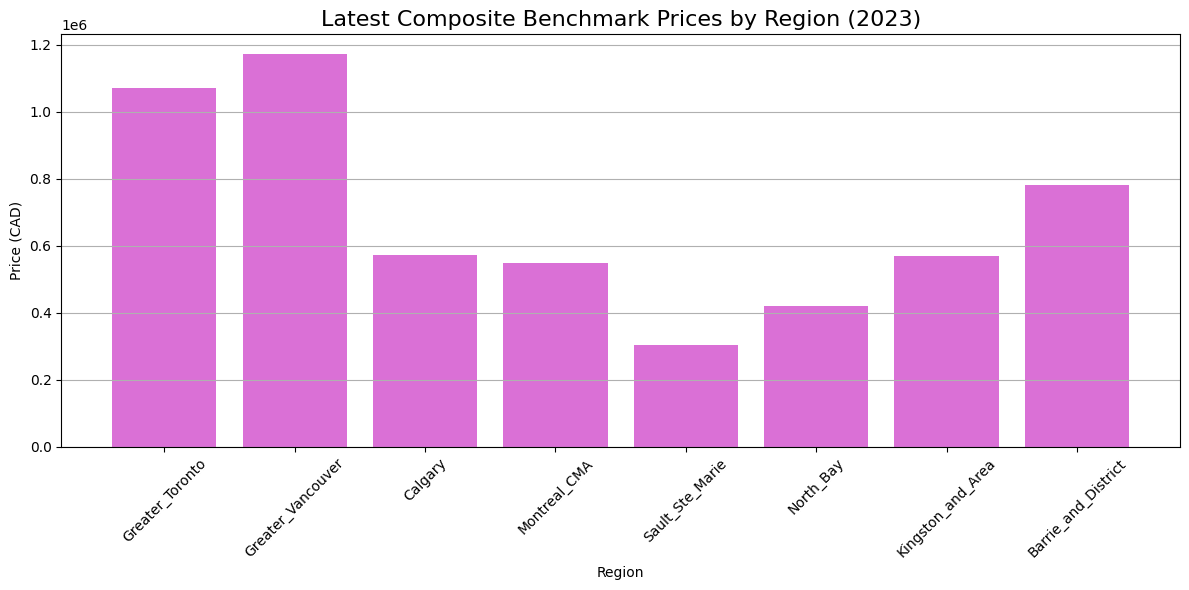

In [31]:
regions = [
    'Greater_Toronto', 'Greater_Vancouver', 'Calgary', 'Montreal_CMA',
    'Sault_Ste_Marie', 'North_Bay', 'Kingston_and_Area', 'Barrie_and_District'
]

#Get latest price for each region
latest_prices = []

for region in regions:
    df = xls.parse(region)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(by='Date')
    latest_price = df.iloc[-1]['Composite_Benchmark']  # Latest benchmark price
    latest_prices.append((region, latest_price))

#Step 5: Convert to DataFrame
df_latest = pd.DataFrame(latest_prices, columns=['Region', 'Latest_Composite_Benchmark'])

#Step 6: Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_latest['Region'], df_latest['Latest_Composite_Benchmark'], color='orchid')

plt.title('Latest Composite Benchmark Prices by Region (2023)', fontsize=16)
plt.xlabel('Region')
plt.ylabel('Price (CAD)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

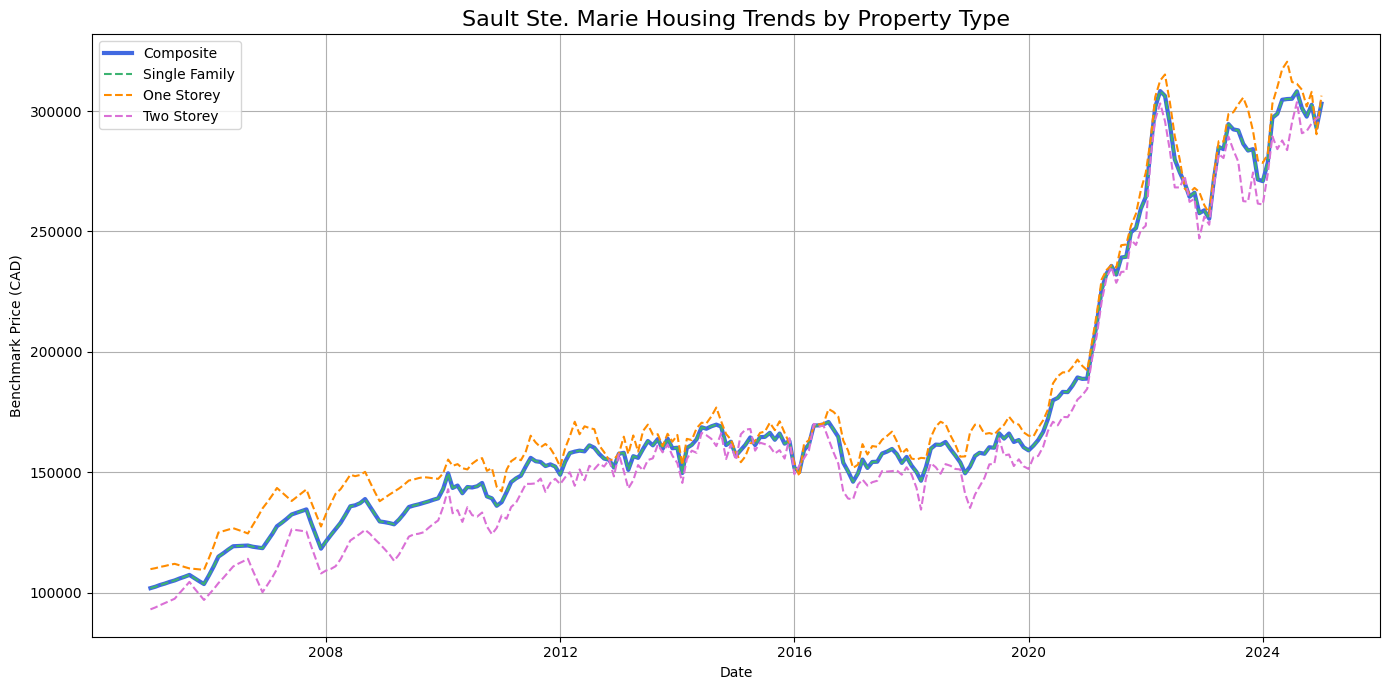

In [33]:
df_sault = xls.parse('Sault_Ste_Marie')
df_sault['Date'] = pd.to_datetime(df_sault['Date'])

plt.figure(figsize=(14, 7))

# Highlight the main trend
plt.plot(df_sault['Date'], df_sault['Composite_Benchmark'], label='Composite', linewidth=3, color='royalblue')

# Use lighter dashed lines for subcategories
plt.plot(df_sault['Date'], df_sault['Single_Family_Benchmark'], label='Single Family', linestyle='--', color='mediumseagreen')
plt.plot(df_sault['Date'], df_sault['One_Storey_Benchmark'], label='One Storey', linestyle='--', color='darkorange')
plt.plot(df_sault['Date'], df_sault['Two_Storey_Benchmark'], label='Two Storey', linestyle='--', color='orchid')

# Chart styling
plt.title('Sault Ste. Marie Housing Trends by Property Type', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Benchmark Price (CAD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

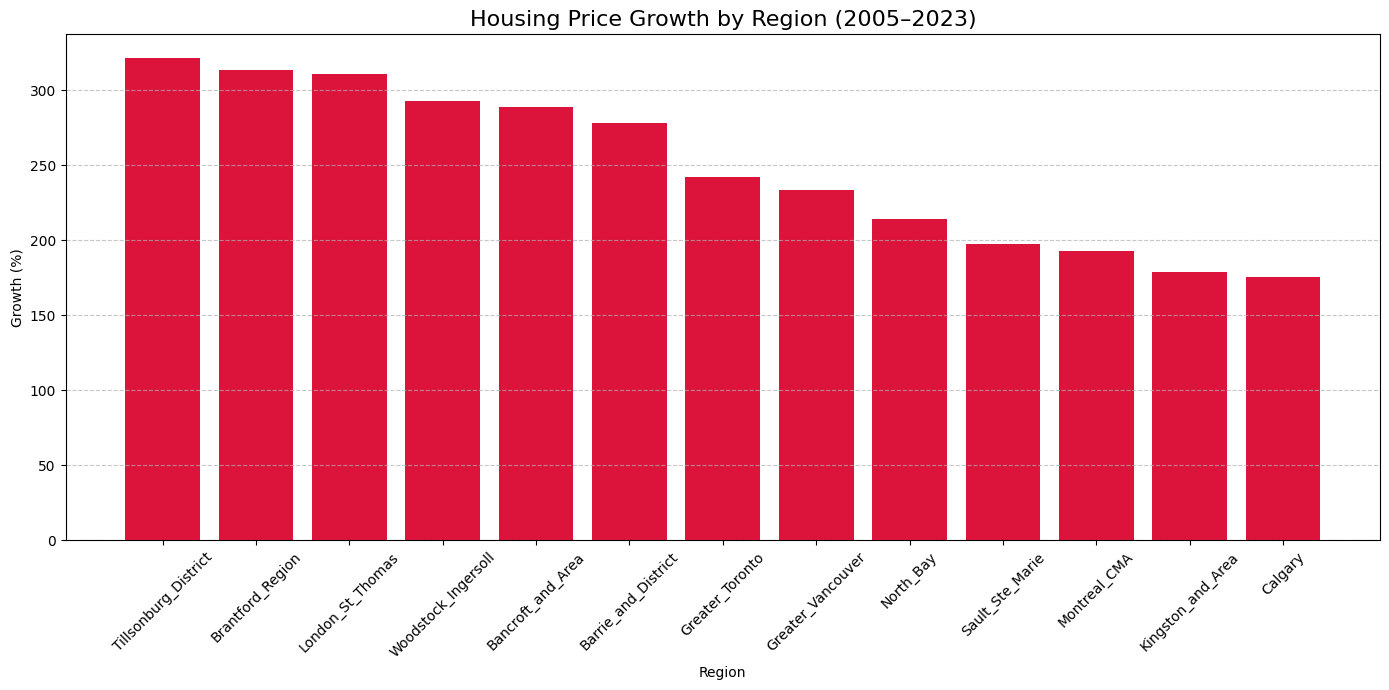

In [53]:
#Combine top growing cities with previous ones
regions = [
    'Greater_Toronto', 'Greater_Vancouver', 'Calgary', 'Montreal_CMA',
    'Sault_Ste_Marie', 'North_Bay', 'Kingston_and_Area', 'Barrie_and_District',
    'Tillsonburg_District', 'Brantford_Region', 'London_St_Thomas',
    'Woodstock_Ingersoll', 'Bancroft_and_Area'
]

# Calculate % growth for each region
growth_data = []

for region in regions:
    df = xls.parse(region)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(by='Date')
    start_price = df.iloc[0]['Composite_Benchmark']
    end_price = df.iloc[-1]['Composite_Benchmark']
    growth_percent = ((end_price - start_price) / start_price) * 100
    growth_data.append((region, growth_percent))

# Create DataFrame and sort
df_growth = pd.DataFrame(growth_data, columns=['Region', 'Growth_%'])
df_growth = df_growth.sort_values(by='Growth_%', ascending=False)

# Plot the chart
plt.figure(figsize=(14, 7))
plt.bar(df_growth['Region'], df_growth['Growth_%'], color='crimson')

plt.title('Housing Price Growth by Region (2005–2023)', fontsize=16)
plt.xlabel('Region')
plt.ylabel('Growth (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

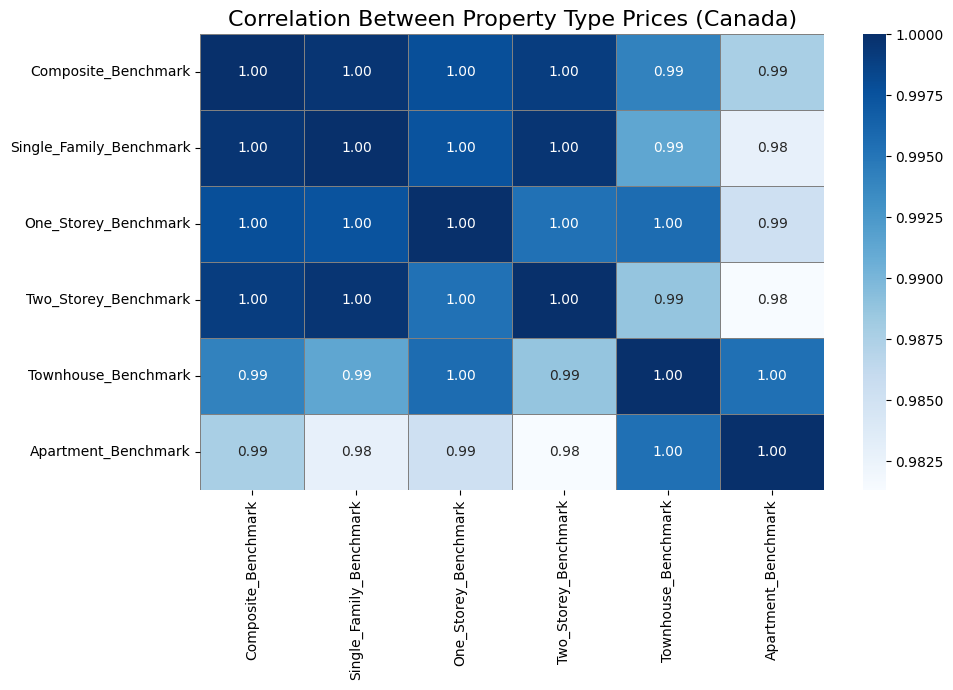

In [55]:
# Import libraries
!pip install seaborn
import seaborn as sns
cols = [
    'Composite_Benchmark', 'Single_Family_Benchmark',
    'One_Storey_Benchmark', 'Two_Storey_Benchmark',
    'Townhouse_Benchmark', 'Apartment_Benchmark'
]

df_corr = df_agg[cols]

corr_matrix = df_corr.corr()

# Select benchmark price columns to compare
cols = [
    'Composite_Benchmark', 'Single_Family_Benchmark',
    'One_Storey_Benchmark', 'Two_Storey_Benchmark',
    'Townhouse_Benchmark', 'Apartment_Benchmark'
]
df_corr = df_agg[cols]

# Calculate correlation matrix
corr_matrix = df_corr.corr()

# Plot the heatmap with blue color contrast
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, linecolor='gray')

plt.title('Correlation Between Property Type Prices (Canada)', fontsize=16)
plt.tight_layout()
plt.show()


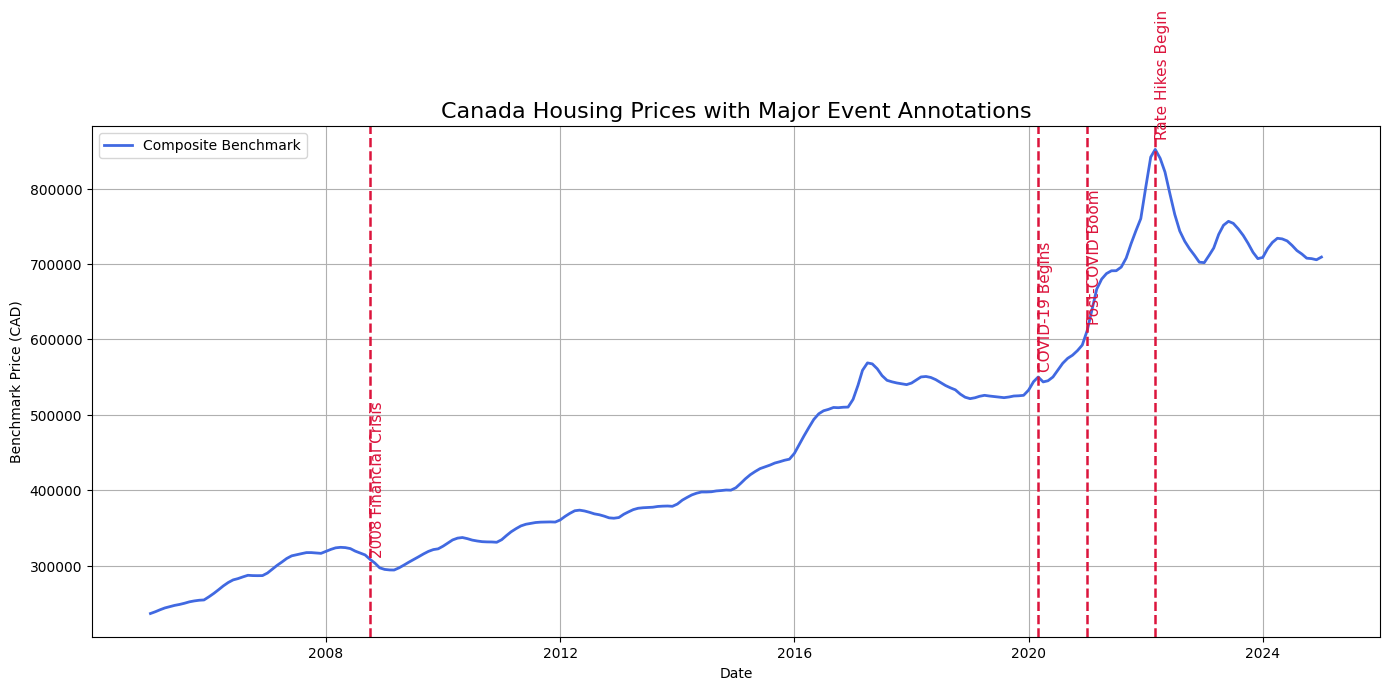

In [57]:
# Important dates and labels
events = {
    "2008-10-01": "2008 Financial Crisis",
    "2020-03-01": "COVID-19 Begins",
    "2021-01-01": "Post-COVID Boom",
    "2022-03-01": "Rate Hikes Begin"
}

# Plot the line chart with event annotations
plt.figure(figsize=(14, 7))
plt.plot(df_agg['Date'], df_agg['Composite_Benchmark'], label='Composite Benchmark', color='royalblue', linewidth=2)

# Annotate each event
for date_str, label in events.items():
    event_date = pd.to_datetime(date_str)
    price_at_event = df_agg[df_agg['Date'] >= event_date]['Composite_Benchmark'].iloc[0]
    plt.axvline(x=event_date, color='crimson', linestyle='--', linewidth=1.8)
    plt.text(event_date, price_at_event * 1.02, label, rotation=90, color='crimson', fontsize=11, ha='left')

# Labels and grid
plt.title('Canada Housing Prices with Major Event Annotations', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Benchmark Price (CAD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
immigration_df = pd.read_csv("immigration_data.csv")

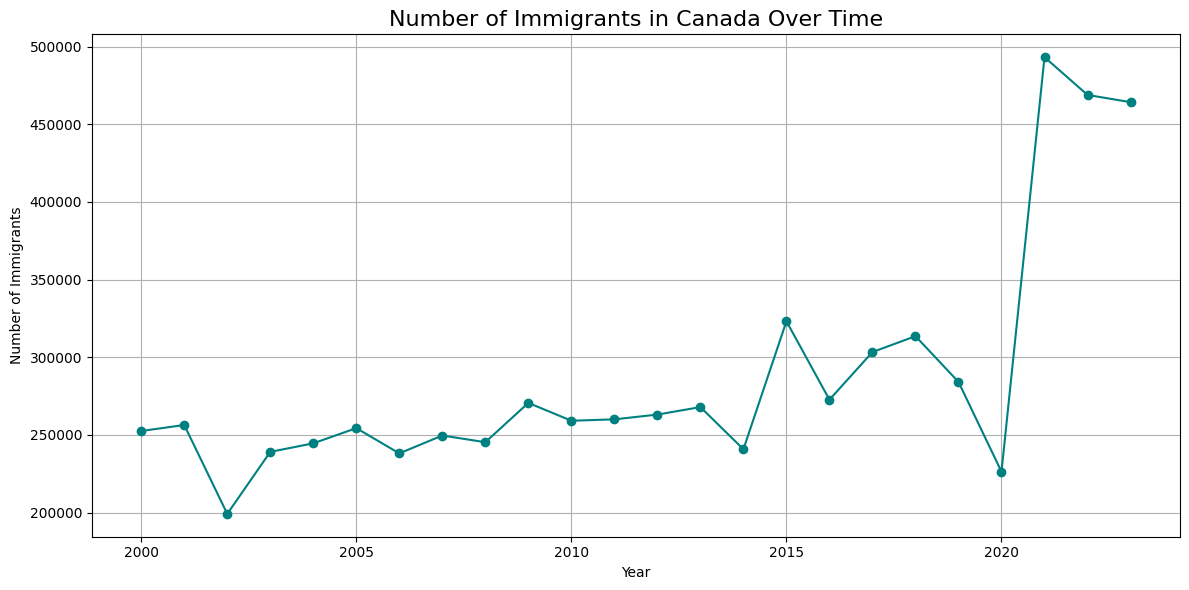

In [59]:
# Step 1: Immigration Over Time
immigration_national = immigration_df[
    (immigration_df['GEO'] == 'Canada') &
    (immigration_df['Components of population growth'] == 'Immigrants')
]
immigration_national = immigration_national.dropna(subset=['VALUE'])
immigration_national['Year'] = immigration_national['REF_DATE'].str[:4].astype(int)

plt.figure(figsize=(12, 6))
plt.plot(immigration_national['Year'], immigration_national['VALUE'], marker='o', color='teal')
plt.title('Number of Immigrants in Canada Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.grid(True)
plt.tight_layout()
plt.show()

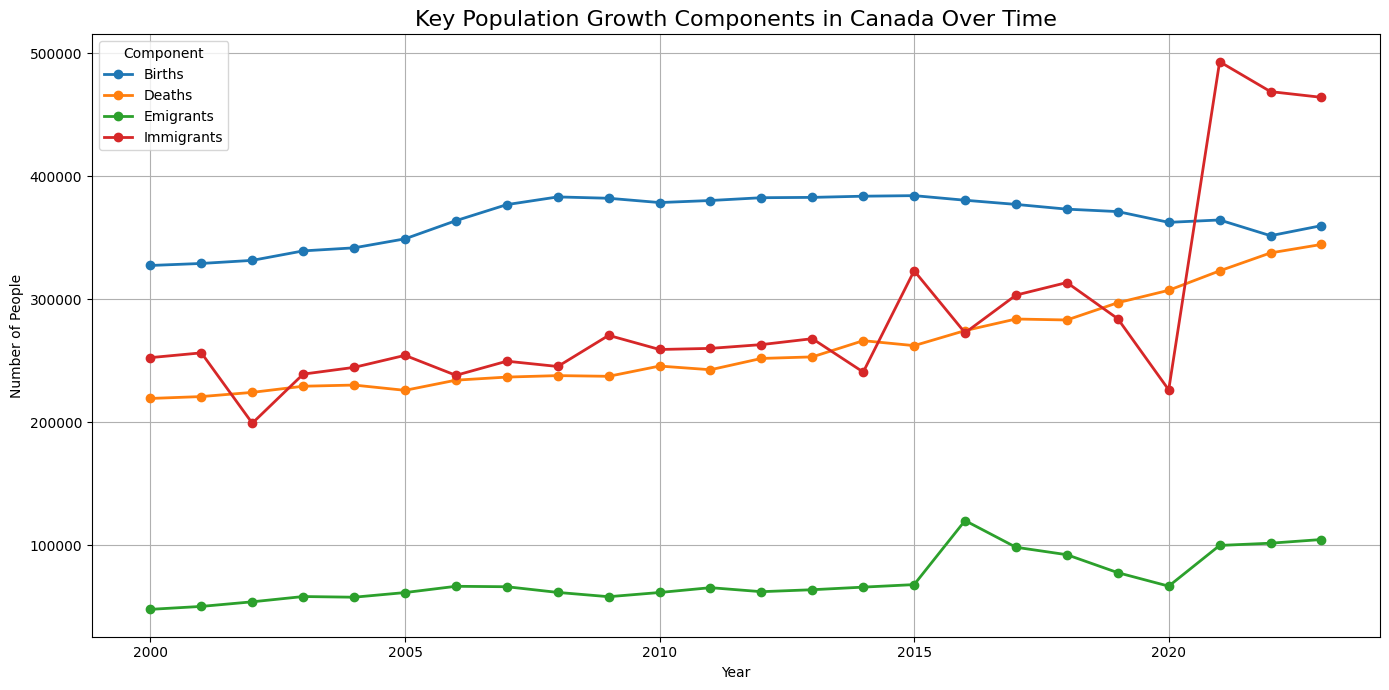

In [65]:
# Step 3: Line chart for all components over all years (Canada only)
#Select key components to compare
key_components = ['Immigrants', 'Births', 'Deaths', 'Emigrants']

# Filter only Canada + selected components, and clean missing values
df_filtered = immigration_df[
    (immigration_df['GEO'] == 'Canada') &
    (immigration_df['Components of population growth'].isin(key_components))
].dropna(subset=['VALUE'])

# Extract numeric year from REF_DATE
df_filtered['Year'] = df_filtered['REF_DATE'].str[:4].astype(int)

# Pivot table to make one column per component
df_key_pivot = df_filtered.pivot_table(
    index='Year',
    columns='Components of population growth',
    values='VALUE',
    aggfunc='sum'
)

# Plot line chart with clear lines
plt.figure(figsize=(14, 7))
df_key_pivot.plot(ax=plt.gca(), marker='o', linewidth=2)

# Format the chart
plt.title('Key Population Growth Components in Canada Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.grid(True)
plt.legend(title='Component')
plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

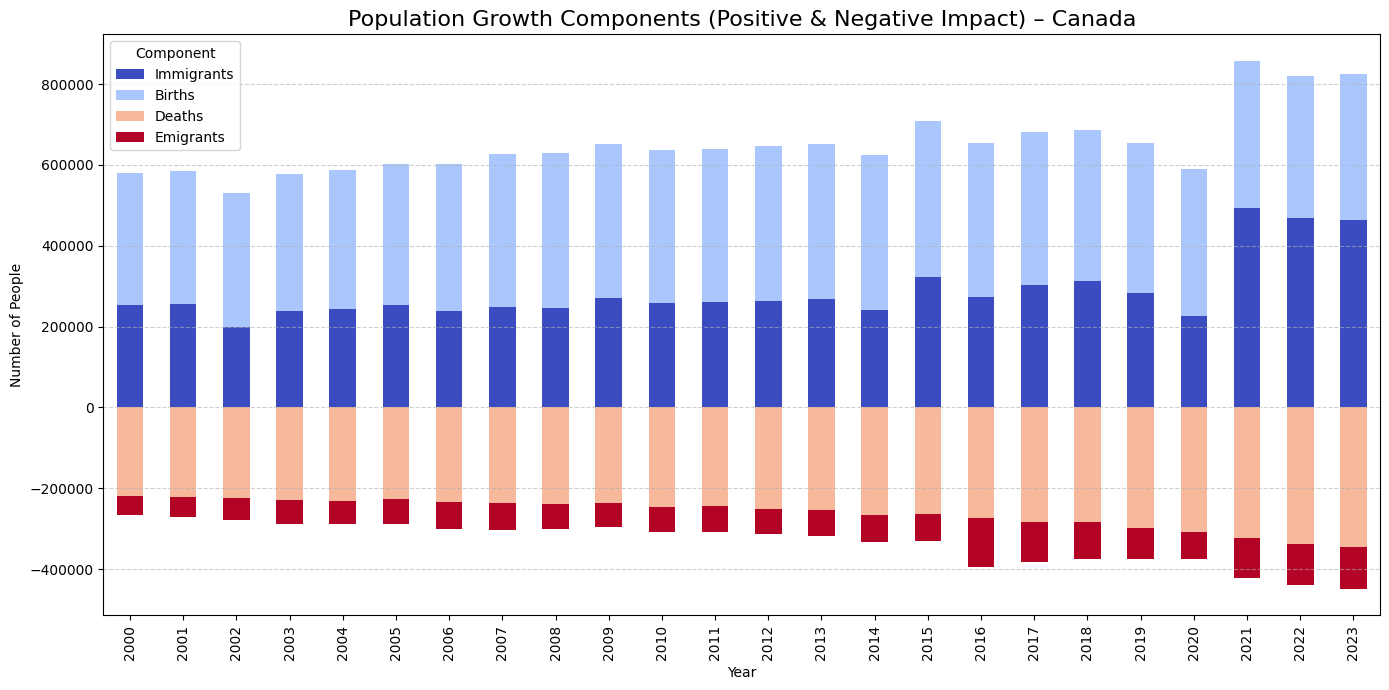

In [67]:

df_signed = df_filtered.copy()
df_signed['Signed_VALUE'] = df_signed.apply(
    lambda row: -row['VALUE'] if row['Components of population growth'] in ['Deaths', 'Emigrants'] else row['VALUE'],
    axis=1
)


df_signed_grouped = df_signed.groupby(['Year', 'Components of population growth'])['Signed_VALUE'].sum().unstack()


plt.figure(figsize=(14, 7))
df_signed_grouped[key_components].plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(14, 7))


plt.title('Population Growth Components (Positive & Negative Impact) – Canada', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Component')
plt.ticklabel_format(style='plain', axis='y')  # avoid scientific notation
plt.tight_layout()
plt.show()

C:\Users\upret\AppData\Local\Temp\ipykernel_13856\417858572.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VALUE', y='GEO', data=df_prov_immigrants, palette='viridis')


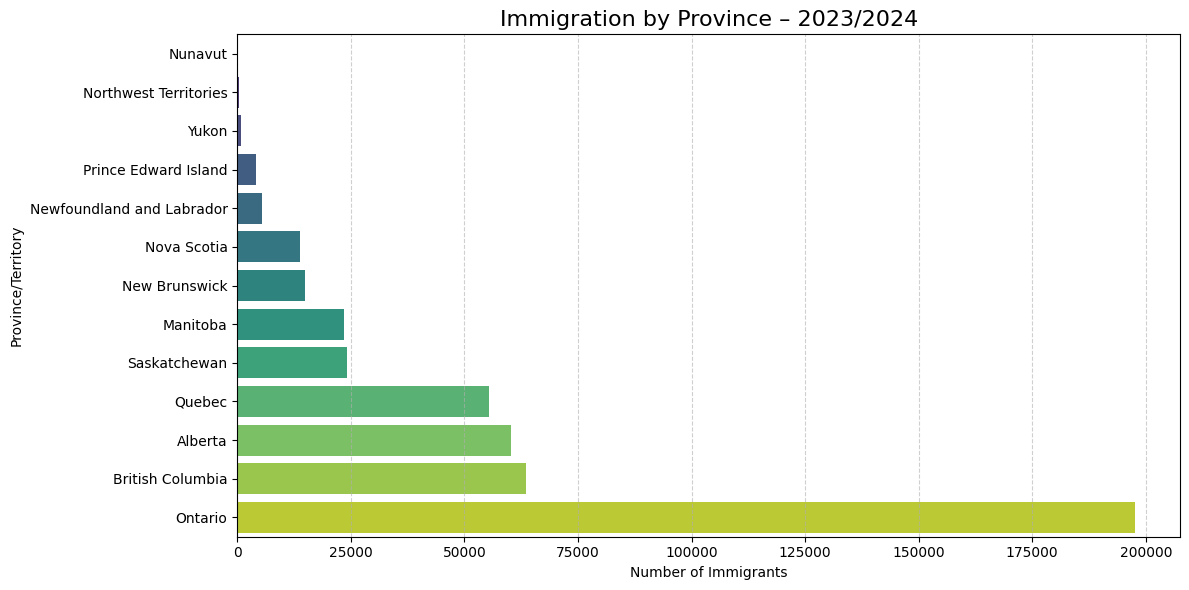

In [91]:
# Get the most recent year available in the dataset
latest_year = immigration_df['REF_DATE'].max()

# Filter for immigrants in that year, excluding the Canada total
df_prov_immigrants = immigration_df[
    (immigration_df['REF_DATE'] == latest_year) &
    (immigration_df['Components of population growth'] == 'Immigrants') &
    (immigration_df['GEO'] != 'Canada')
]

# Drop rows with missing values
df_prov_immigrants = df_prov_immigrants.dropna(subset=['VALUE'])

# Sort by number of immigrants in ascending order for better visualization
df_prov_immigrants = df_prov_immigrants.sort_values(by='VALUE', ascending=True)

# Plot a horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='VALUE', y='GEO', data=df_prov_immigrants, palette='viridis')

plt.title(f'Immigration by Province – {latest_year}', fontsize=16)
plt.xlabel('Number of Immigrants')
plt.ylabel('Province/Territory')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

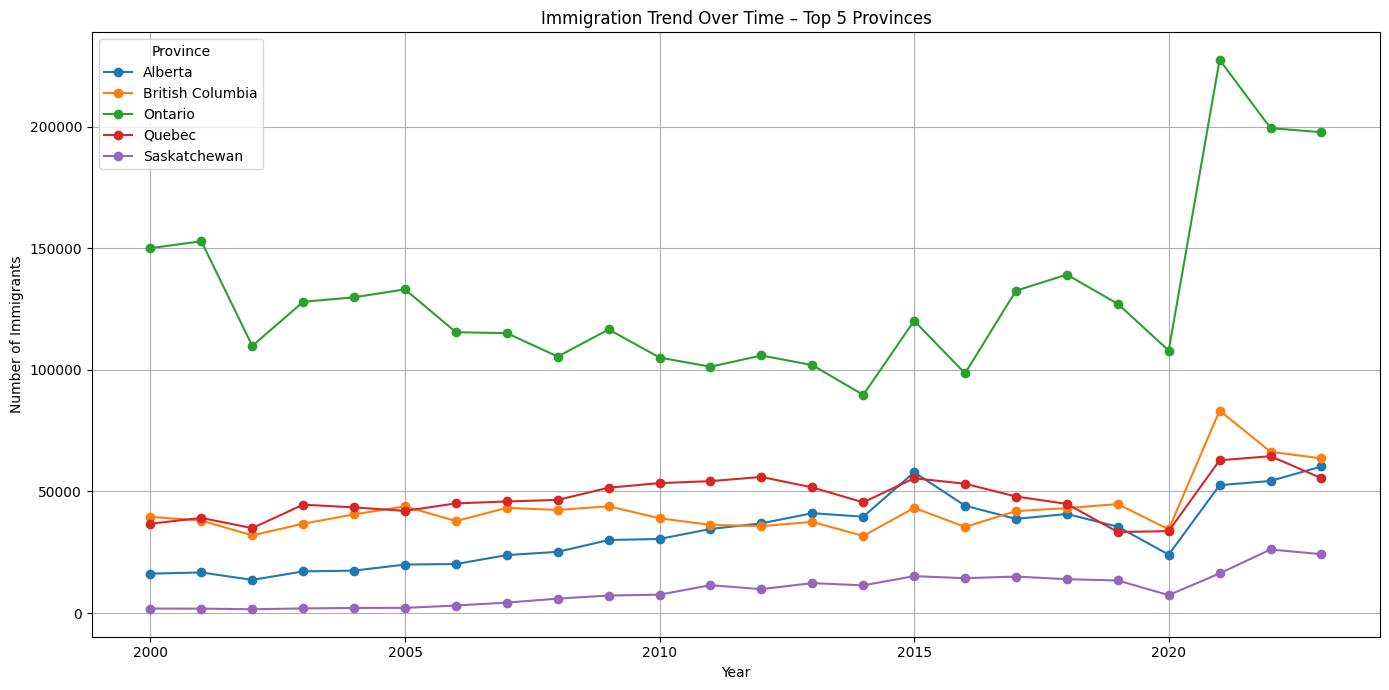

In [71]:
# Filter for immigrants only, exclude Canada total
df_prov_trend = immigration_df[
    (immigration_df['Components of population growth'] == 'Immigrants') &
    (immigration_df['GEO'] != 'Canada')
].dropna(subset=['VALUE'])

# Extract numeric year
df_prov_trend['Year'] = df_prov_trend['REF_DATE'].str[:4].astype(int)

# Get top 5 provinces by immigration in the most recent year
top_provinces = df_prov_immigrants.sort_values(by='VALUE', ascending=False).head(5)['GEO'].tolist()

# Filter for top 5 provinces only
df_top_prov_trend = df_prov_trend[df_prov_trend['GEO'].isin(top_provinces)]

# Pivot for plotting
df_top_pivot = df_top_prov_trend.pivot_table(index='Year', columns='GEO', values='VALUE', aggfunc='sum')

# Plot immigration trends
plt.figure(figsize=(14, 7))
df_top_pivot.plot(ax=plt.gca(), marker='o')

plt.title('Immigration Trend Over Time – Top 5 Provinces')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.grid(True)
plt.legend(title='Province')
plt.tight_layout()
plt.show()

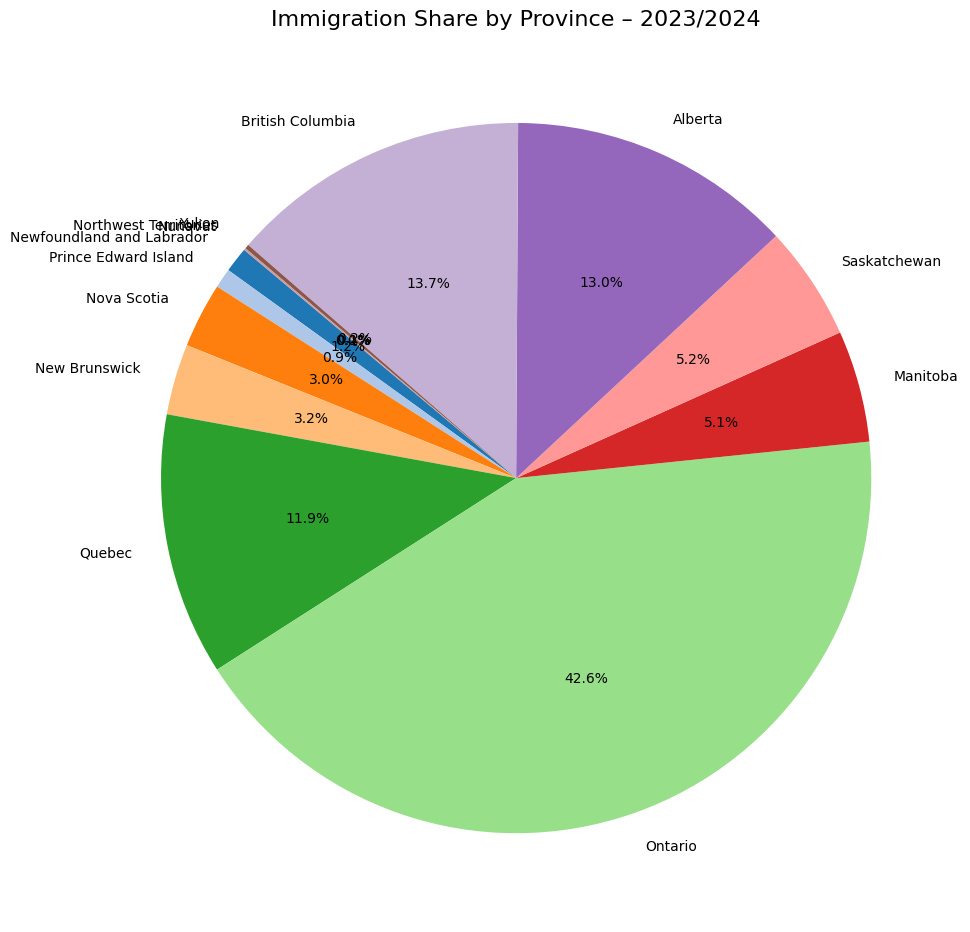

In [73]:
# Use data for immigrants in the latest year, excluding Canada total
df_pie = immigration_df[
    (immigration_df['REF_DATE'] == latest_year) &
    (immigration_df['Components of population growth'] == 'Immigrants') &
    (immigration_df['GEO'] != 'Canada')
].dropna(subset=['VALUE'])

# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    df_pie['VALUE'],
    labels=df_pie['GEO'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('tab20', len(df_pie))
)

plt.title(f'Immigration Share by Province – {latest_year}', fontsize=16)
plt.tight_layout()
plt.show()


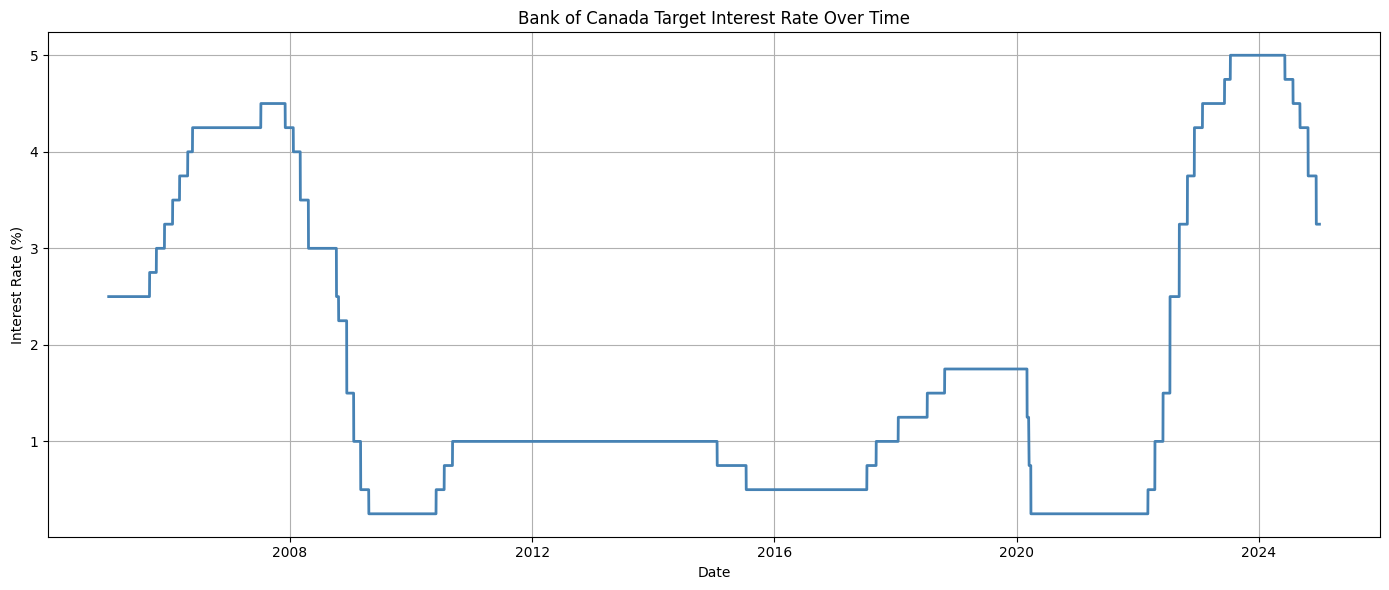

In [75]:
# Load the dataset
file_path = "interestrate_data.csv"  # update path if needed
interest_df = pd.read_csv(file_path)

# Filter for Target Rate only
df_target = interest_df[interest_df['Financial market statistics'] == 'Target rate'].copy()

# Convert REF_DATE to datetime
df_target['Date'] = pd.to_datetime(df_target['REF_DATE'], dayfirst=True)

# Drop rows with missing values
df_target = df_target.dropna(subset=['VALUE'])

# Sort by date
df_target = df_target.sort_values(by='Date')

# Plot Target Rate over time
plt.figure(figsize=(14, 6))
plt.plot(df_target['Date'], df_target['VALUE'], color='steelblue', linewidth=2)

plt.title('Bank of Canada Target Interest Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Interest Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

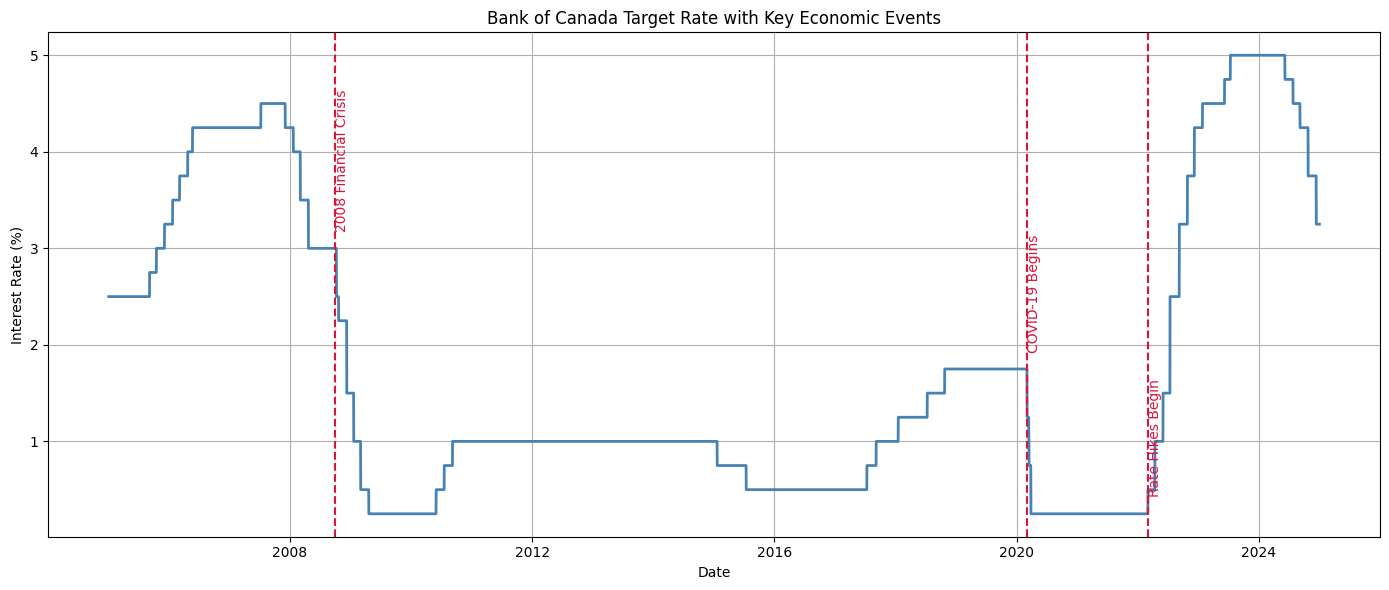

In [77]:
# Define key events with labels
events = {
    '2008-10-01': '2008 Financial Crisis',
    '2020-03-01': 'COVID-19 Begins',
    '2022-03-01': 'Rate Hikes Begin'
}

# Plot with annotations
plt.figure(figsize=(14, 6))
plt.plot(df_target['Date'], df_target['VALUE'], color='steelblue', linewidth=2)

for date_str, label in events.items():
    event_date = pd.to_datetime(date_str)
    rate_at_event = df_target[df_target['Date'] >= event_date]['VALUE'].iloc[0]
    plt.axvline(x=event_date, color='crimson', linestyle='--', linewidth=1.5)
    plt.text(event_date, rate_at_event + 0.2, label, rotation=90, color='crimson', fontsize=10)

plt.title('Bank of Canada Target Rate with Key Economic Events')
plt.xlabel('Date')
plt.ylabel('Interest Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

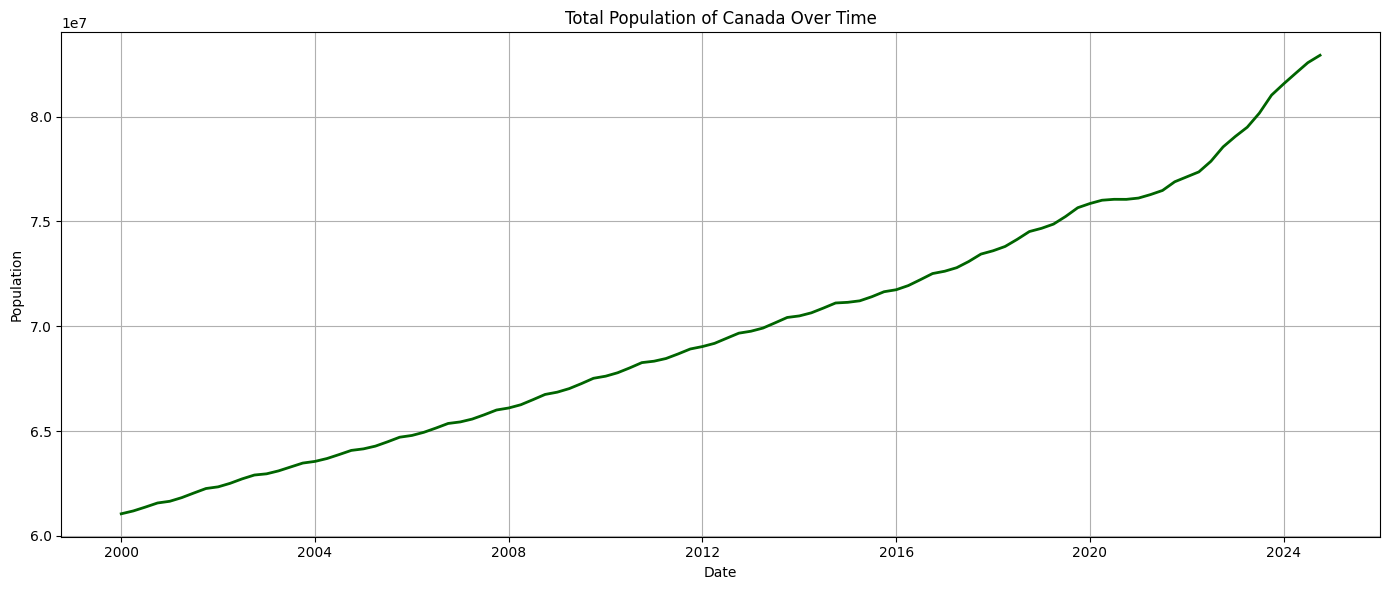

In [81]:
# Load the population dataset
population_df = pd.read_csv("population_data.csv")

# Convert REF_DATE to datetime
population_df['Date'] = pd.to_datetime(population_df['REF_DATE'])

# Drop rows with missing population values
population_df = population_df.dropna(subset=['VALUE'])

# Group by date and calculate total population
df_total_trend = population_df.groupby('Date')['VALUE'].sum().reset_index()

# Plot the population trend
plt.figure(figsize=(14, 6))
plt.plot(df_total_trend['Date'], df_total_trend['VALUE'], color='darkgreen', linewidth=2)

plt.title('Total Population of Canada Over Time')
plt.xlabel('Date')
plt.ylabel('Population')
plt.grid(True)
plt.tight_layout()
plt.show()

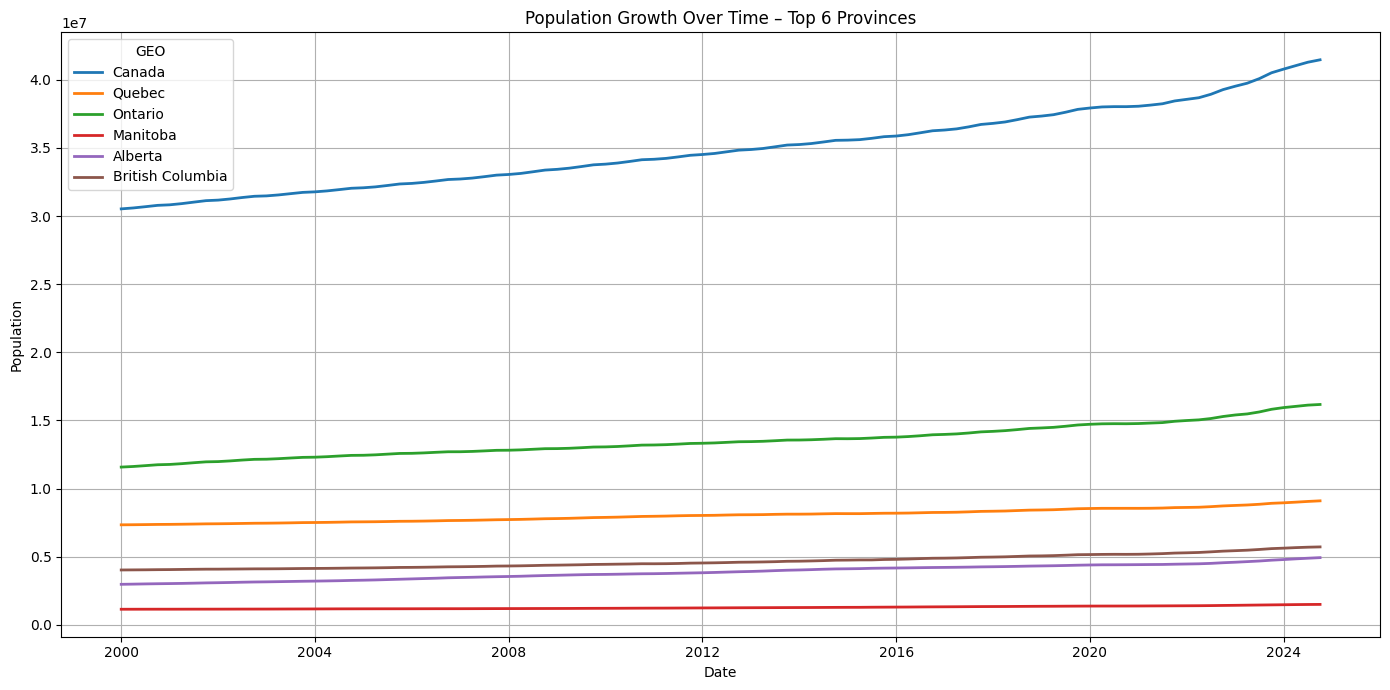

In [83]:
# Get the latest date in the dataset
latest_date = population_df['Date'].max()

# Get top 6 provinces by population on the latest date
top_provinces = (
    population_df[population_df['Date'] == latest_date]
    .sort_values(by='VALUE', ascending=False)
    .head(6)['GEO']
    .tolist()
)

# Filter data only for those provinces
df_top_provinces = population_df[population_df['GEO'].isin(top_provinces)]

# Plot line chart of population trends for top 6 provinces
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_top_provinces, x='Date', y='VALUE', hue='GEO', linewidth=2)

plt.title('Population Growth Over Time – Top 6 Provinces')
plt.xlabel('Date')
plt.ylabel('Population')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\upret\AppData\Local\Temp\ipykernel_13856\2317637838.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VALUE', y='GEO', data=df_latest, palette='Set2')


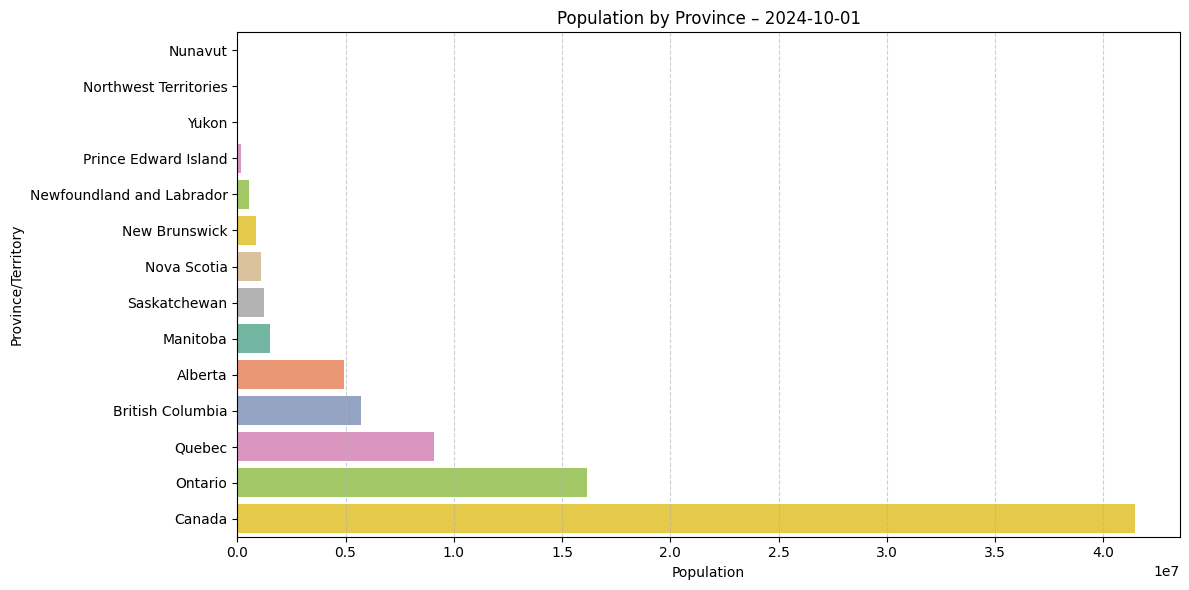

In [93]:
# Filter data for the latest available date

# Filter data for latest date and sort
df_latest = (
    population_df[population_df['Date'] == latest_date]
    .sort_values(by='VALUE', ascending=True)
)

# Plot horizontal bar chart with improved color palette
plt.figure(figsize=(12, 6))
sns.barplot(x='VALUE', y='GEO', data=df_latest, palette='Set2')

plt.title(f'Population by Province – {latest_date.date()}')
plt.xlabel('Population')
plt.ylabel('Province/Territory')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()